# KMean Algorithem

In [2]:
# It used to cluster for example customer into groups that share the same attributes

## 1- Import libraries and DataSet

In [196]:
# We will start with importing the libraries that we will use with this algorithem
import pandas as pd
import numpy

# for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# To standarize the dataset
from sklearn.preprocessing import StandardScaler

# To cluster the dataset
from sklearn.cluster import KMeans
import scipy

# for PCA method
from sklearn.decomposition import PCA

# export data model
import pickle

In [175]:
# import dataset and read it, set the first column as a index

url='segmentation_dataset.csv'
df=pd.read_csv(url,index_col=0)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [177]:
df_copy1=df.copy()

## 2- Check and Explore dataset and deal with missing values

In [71]:
# check the size of the dataset
df.shape

(2000, 7)

In [73]:
# check the information of a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [75]:
# Check the missing values

df.isnull().sum()/len(df)*100

Sex                0.0
Marital status     0.0
Age                0.0
Education          0.0
Income             0.0
Occupation         0.0
Settlement size    0.0
dtype: float64

In [10]:
# remove all missing values from the df and we will use inplace=True so we will alter the same df and not 
# create another one. in another word, we'll modifiy the same data frame.
#df.dropna(inplace=True)


In [11]:
# Check df again
#df.isnull().sum()/len(df)*100

In [77]:
# Get the descriptive statistics of our data frame
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


#### Correlation Estimate

In [79]:
#Here we will see the correlation of our dataset to get a better idea about the relationship between the features
#  a linear relationship between two continuous variables. It range is  -1 --> 0 --> 1, -1 negative correlation, 0 they are independent and 1
# is posative correltation between two variables

df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

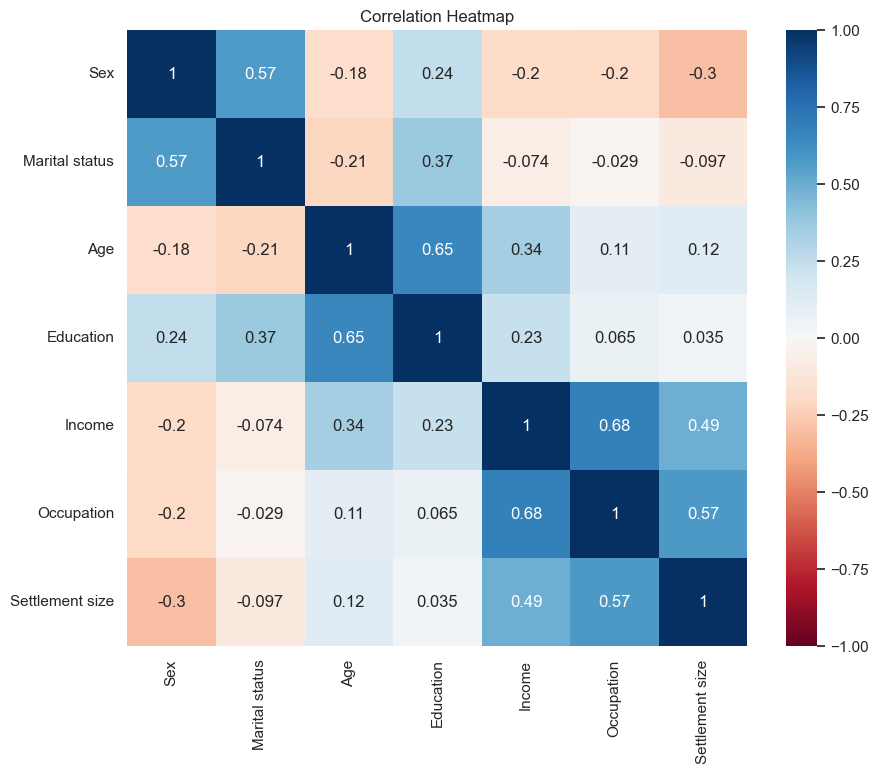

In [81]:
# A heatmap is a best tool to visualise the correlation 
plt.figure(figsize=(10,8))
s=sns.heatmap(df.corr(),
              annot=True,
             cmap='RdBu',
             vmin=-1,
              vmax=1
             )
plt.title('Correlation Heatmap')

#### Visualize our raw dataset
Now we would like to visualise our raw data using scatter plot.

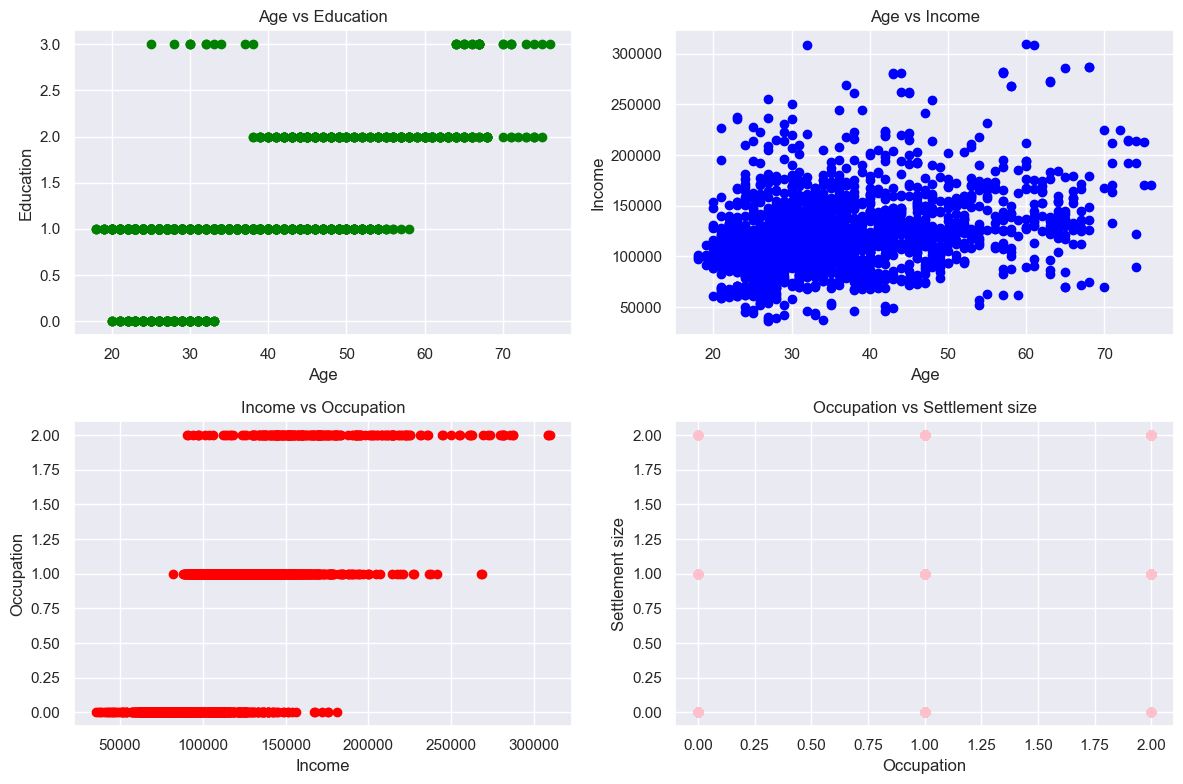

In [85]:
# Creating subplots with 2 row and 2 columns (grid layout)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# First subplot: Scatter plot of Age vs Education
axes[0,0].scatter(x=df['Age'], y=df['Education'], color='green')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Education')
axes[0,0].set_title('Age vs Education')

# Second subplot: Scatter plot of Age vs Income 
axes[0,1].scatter(x=df['Age'], y=df['Income'], color='blue')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Income')
axes[0,1].set_title('Age vs Income')

# Third subplot: Scatter plot of Income vs Occupation 
axes[1,0].scatter(x=df['Income'], y=df['Occupation'], color='red')
axes[1,0].set_xlabel('Income')
axes[1,0].set_ylabel('Occupation')
axes[1,0].set_title('Income vs Occupation')


# fourth subplot: Scatter plot of Occupation vs Settlemnet
axes[1,1].scatter(x=df['Occupation'], y=df['Settlement size'], color='pink')
axes[1,1].set_xlabel('Occupation')
axes[1,1].set_ylabel('Settlement size')
axes[1,1].set_title('Occupation vs Settlement size')


# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


## 3- Standardise the dataset

In [89]:
# Here we will standardise the dataset so that all features contribute equally to the model's training process.
scaler=StandardScaler()

In [87]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [91]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [93]:
# here i would like to scale my df but first i will make a copy of my df
# so i can have the original df and the scaled one
df_scaled=df.copy()
df_scaled[['Age','Income']]=scaler.fit_transform(df_scaled[['Age','Income']]) # scaled only numerical feature

In [95]:
df_scaled

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,2.653614,2,0.097524,1,2
100000002,1,1,-1.187132,1,0.782654,1,2
100000003,0,0,1.117316,1,-0.833202,0,0
100000004,0,0,0.775916,1,1.328386,1,1
100000005,0,0,1.458716,1,0.736932,1,1
...,...,...,...,...,...,...,...
100001996,1,0,0.946616,1,0.067471,0,0
100001997,1,1,-0.760382,1,-0.084265,1,0
100001998,0,0,-0.418983,0,-0.906957,0,0


## 4- Find the number of Clustering that we need in 

In [97]:
df_scaled.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

#### Elbo method

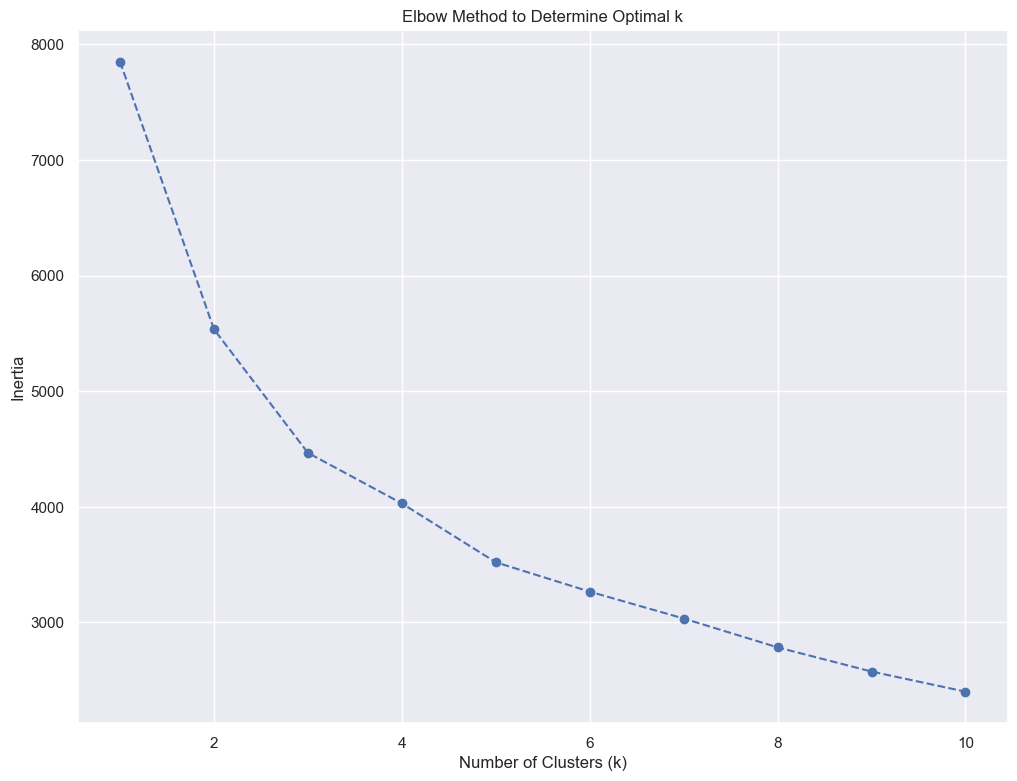

In [99]:
#### A- Determine the number of clusters that we should have and here we'll use the elbow method.

# Empty List to store inertia values
inertia=[]

# Range of k clusters or number of clusters that we suggest could be one or two ,...,10
k_clusters_values=range(1,11)

#Calculate KMeans for each k (point) and store the inertia
for k in k_clusters_values:# run a loop to 
    # calculate the number of clusters that we should have.init='k-means++' is an algorithem to calculate the best centroide to start with
    kmeans=KMeans(n_clusters=k,random_state=42,init='k-means++') 
    kmeans.fit(df_scaled) # assign points (our data) to each centeroid that we have
    inertia.append(kmeans.inertia_) # add inertia point or data to our inertia list

# Draw the Elbow plot
plt.figure(figsize=(12,9))
plt.plot(k_clusters_values, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [101]:
df_scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,2.653614,2,0.097524,1,2
100000002,1,1,-1.187132,1,0.782654,1,2
100000003,0,0,1.117316,1,-0.833202,0,0
100000004,0,0,0.775916,1,1.328386,1,1
100000005,0,0,1.458716,1,0.736932,1,1


## 5- Clustering the data set

In [103]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df_scaled[['Age', 'Income']])  # Fit the model

KMeans(n_clusters=4, random_state=42)

In [105]:
# Assign clusters to the original DataFrame
df['clusters'] = kmeans.labels_  # Use labels_ after fitting
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,3
100000002,1,1,22,1,150773,1,2,1
100000003,0,0,49,1,89210,0,0,3
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,3
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,3
100001997,1,1,27,1,117744,1,0,0
100001998,0,0,31,0,86400,0,0,0


## 6- Result

### 1- characteristics of each cluster

In [107]:
# Now we'll see the characteristics of each cluster in our df by group them togather and calculate the mean of them
segments_analysis=df.groupby(['clusters']).mean()
segments_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
clusters,,,,,,,
0,0.584862,0.589450,28.983945,0.823394,92620.527523,0.504587,0.416284
1,0.376623,0.464286,32.694805,0.900974,137462.011364,1.102273,0.996753
2,0.254386,0.368421,44.684211,1.315789,221094.587719,1.710526,1.500000
3,0.359296,0.379397,53.542714,1.640704,128799.889447,0.771357,0.829146


In [109]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,3
100000002,1,1,22,1,150773,1,2,1
100000003,0,0,49,1,89210,0,0,3
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,3
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,3
100001997,1,1,27,1,117744,1,0,0
100001998,0,0,31,0,86400,0,0,0


In [111]:
# assign names to clusters in the original DF

df['labels']=df['clusters'].map({0:'Standard',1:'Career-focused',2:'well off',3:'Fewer Opportunities'})
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters,labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,3,Fewer Opportunities
100000002,1,1,22,1,150773,1,2,1,Career-focused
100000003,0,0,49,1,89210,0,0,3,Fewer Opportunities
100000004,0,0,45,1,171565,1,1,2,well off
100000005,0,0,53,1,149031,1,1,3,Fewer Opportunities
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,3,Fewer Opportunities
100001997,1,1,27,1,117744,1,0,0,Standard
100001998,0,0,31,0,86400,0,0,0,Standard


### The size of each cluster and its %

In [113]:
segments_analysis['cluster_size']=df[['clusters','Sex']].groupby('clusters').count()

In [115]:
segments_analysis['%']=segments_analysis['cluster_size']/segments_analysis['cluster_size'].sum()*100

In [117]:
segments_analysis=segments_analysis.rename({0:'Standard',1:'Career-focused',2:'well off',3:'Fewer Opportunities'})

In [119]:
segments_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_size,%
clusters,,,,,,,,,
Standard,0.584862,0.589450,28.983945,0.823394,92620.527523,0.504587,0.416284,872,43.6
Career-focused,0.376623,0.464286,32.694805,0.900974,137462.011364,1.102273,0.996753,616,30.8
well off,0.254386,0.368421,44.684211,1.315789,221094.587719,1.710526,1.500000,114,5.7
Fewer Opportunities,0.359296,0.379397,53.542714,1.640704,128799.889447,0.771357,0.829146,398,19.9


### 7- Visual the kmeans data

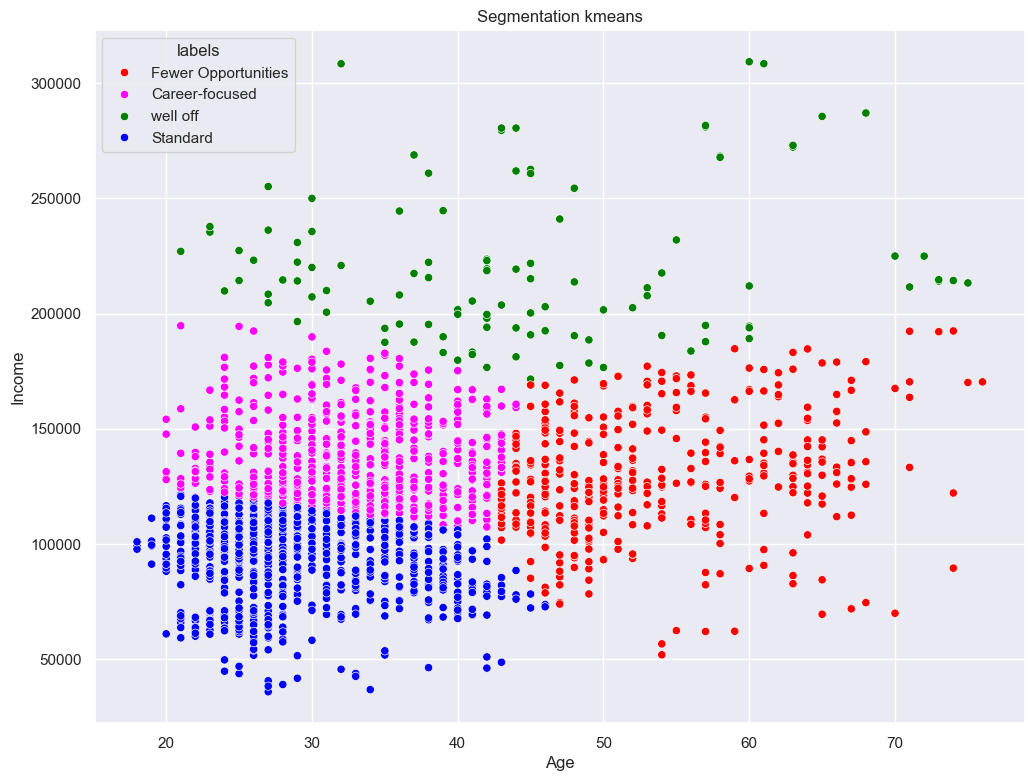

In [121]:
x_axis=df['Age']
y_axis=df['Income']
plt.figure(figsize=(12,9))
sns.scatterplot(x=x_axis,y=y_axis,hue=df['labels'],palette=('red','magenta','green','blue'))
plt.title('Segmentation kmeans')
plt.show()

### 8- Principal components analysis (PCA)

In [123]:
# First i'll take a copy from original dataset
df_copy_pca=df.copy()
# delete clusters, and labels columns
df_copy_pca=df_copy_pca.drop(columns=['labels','clusters'],axis=1)
df_copy_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [125]:
# standarise the dataset 
df_copy_pca=scaler.fit_transform(df_copy_pca)

In [127]:
df_copy_pca

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [129]:
# create psa instance
pca=PCA()

In [131]:
# examine the data with only fit()
pca.fit(df_copy_pca)

PCA()

In [133]:
df_copy_pca

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [135]:
# see the ratio of each variance in the data set.
#it tells you how much information (variance) is retained by each principal component after the transformation.
#As we can see there are 7 components in our data set.The first 2 components represent the big portion of the variances of the data set

pca.explained_variance_ratio_

# Note: the 7 components represent the dataset we have, so if we some all of them we'll get 1
# The first component explaine 35% of the variability of the data


array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

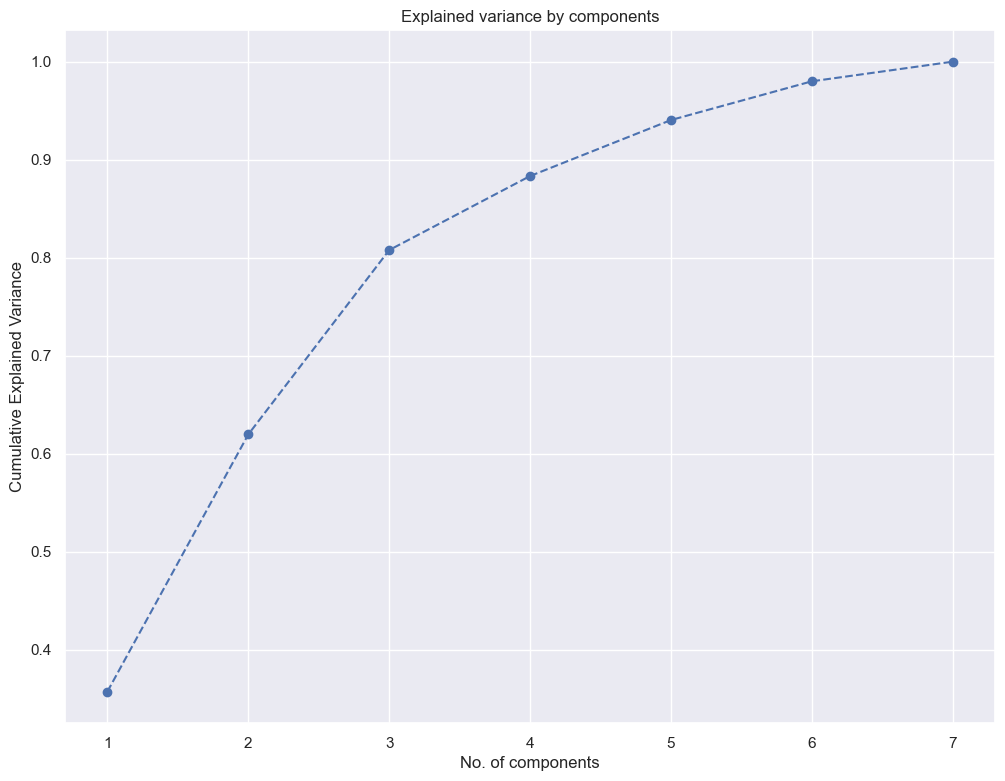

In [137]:
# Our tast is to find a subset of components,while preserving as much as possible of the variances
# we'll draw a graph to deside how much components we'll choose and we'll use cumsum to help us doing that

plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('No. of components')
plt.ylabel('Cumulative Explained Variance')

In [139]:
# We will start write a code to choose 3 components only
pca=PCA(n_components=3)
pca.fit(df_copy_pca)


PCA(n_components=3)

## PCA Result

In [141]:
# understand the information using the following code
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [143]:
pca_comp_df=pd.DataFrame(data=pca.components_,
                         columns=['Sex','Marital status','Age',	'Education','Income','Occupation','Settlement size'],
                         index=['component_1','component_2','component_3'])
pca_comp_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component_1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component_2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component_3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


<Axes: >

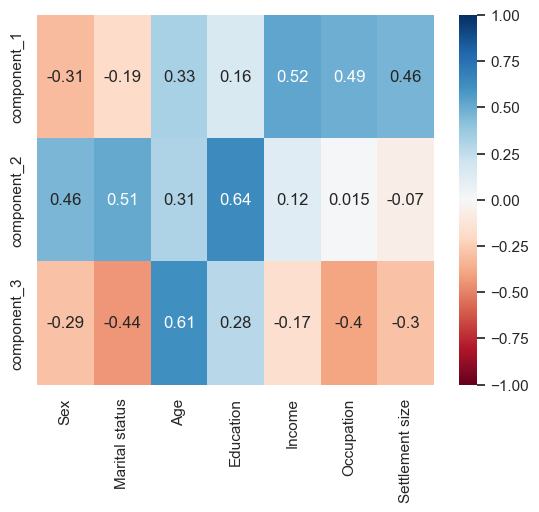

In [145]:
# lets visualise the data with heatmap
sns.heatmap(pca_comp_df,annot=True,vmin=-1,vmax=1,cmap='RdBu')



In [147]:
pca.transform(df_copy_pca)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [149]:
# Now we should transform our data from 7 to 3 dimentional,so we can save these values that we optain in  3 pca score

scores_pca=pca.transform(df_copy_pca)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

## We perform kmean on the scores_pca

### KMeans Clustering with PSA
### Elbow Method

In [151]:
inertia=[]
cluster=range(1,11)
for k in cluster:
    kmean_pca=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmean_pca.fit(scores_pca)
    inertia.append(kmean_pca.inertia_)

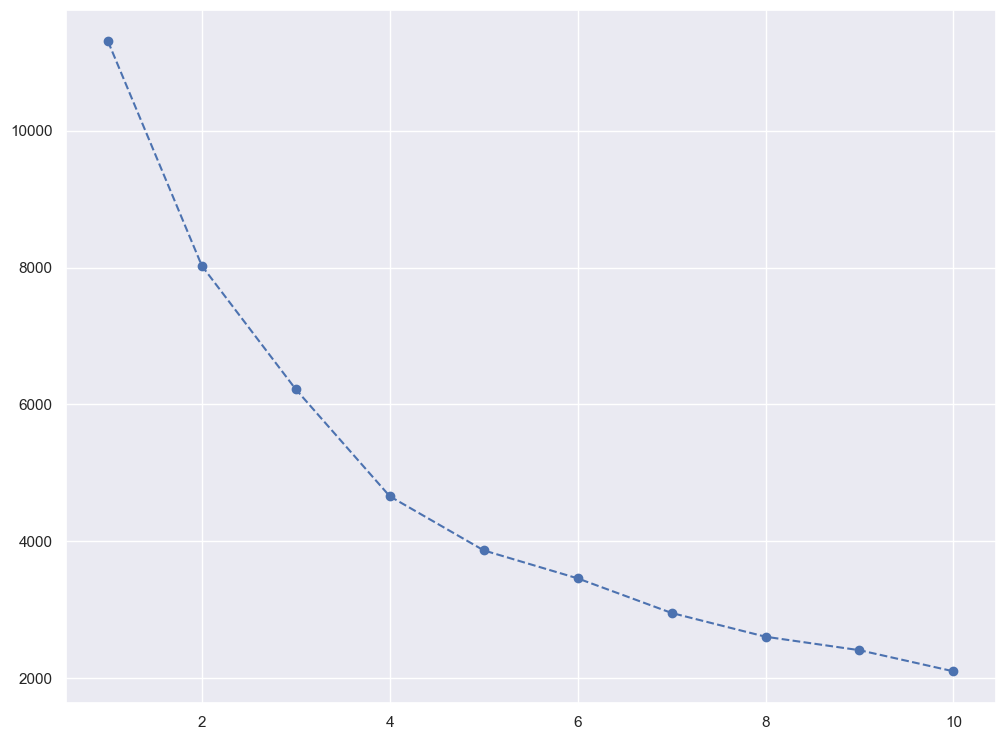

In [153]:
plt.figure(figsize=(12,9))
plt.plot(cluster,inertia,marker='o',linestyle='--')
plt.show()

In [155]:
kmean_pca=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmean_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

## Result Analysis of kmeans PCA

In [179]:
df_copy1

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [181]:
# lets create a new dataframe contain the original dataframe and the component one 

original_and_kmean_pca_df=pd.concat([df_copy1.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)

# lets add names to the last 3 columns
original_and_kmean_pca_df.columns.values[-3:]=['component_1','component_2','component_3']

# lets add the clustering according to kmean pca
original_and_kmean_pca_df['kmeans_pca']=kmean_pca.labels_
original_and_kmean_pca_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,kmeans_pca
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,1


### Insights

In [183]:
Insighs=original_and_kmean_pca_df.groupby('kmeans_pca').mean()
Insighs

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3
kmeans_pca,,,,,,,,,,
0,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063
1,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678
2,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763
3,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641


Here we will explain the result of the insights that we had:

1- As we said before the **first component** for career, the **second** for life style and **third** for experiance.

2- according to these components, we can see that the segment 0 is **high for career and low for education** (**Career-focused**)
                                                  the segment 1 is **low for career and education** (**Fewer Opportunities** )
                                                  the segment 2 is **low career and high education** (**Standard**)
                                                  the segment 3 is **high on both** (**well off**)
                                                  
3- from the last segments we divided the customers into ('Standard','Career-focused','well off','Fewer Opportunities'), and now we'll use the same thing here but accourding to components that we had 


   
   
   
   

In [185]:
# We want to know how many people in each segment and them percentage 
# calculate how many customers in each segment 
Insighs['cluster_size']=original_and_kmean_pca_df[['kmeans_pca','Sex']].groupby('kmeans_pca').count()

# calculate the percentage of each segment
Insighs['%']=Insighs['cluster_size']/Insighs['cluster_size'].sum()*100

# rename the clusters

Insighs=Insighs.rename({0:'Career-focused',1:'Fewer Opportunities', 2:'Standard',3:'well off'}) 

Insighs

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,cluster_size,%
kmeans_pca,,,,,,,,,,,,
Career-focused,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063,602,30.1
Fewer Opportunities,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678,610,30.5
Standard,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763,526,26.3
well off,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641,262,13.1


In [189]:
# map segments names to df

original_and_kmean_pca_df['labels']=original_and_kmean_pca_df['kmeans_pca'].map({0:'Career-focused',1:'Fewer Opportunities', 2:'Standard',3:'well off'})
original_and_kmean_pca_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,kmeans_pca,labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,Standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1,Fewer Opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0,Career-focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0,Career-focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1,Fewer Opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2,Standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1,Fewer Opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,1,Fewer Opportunities


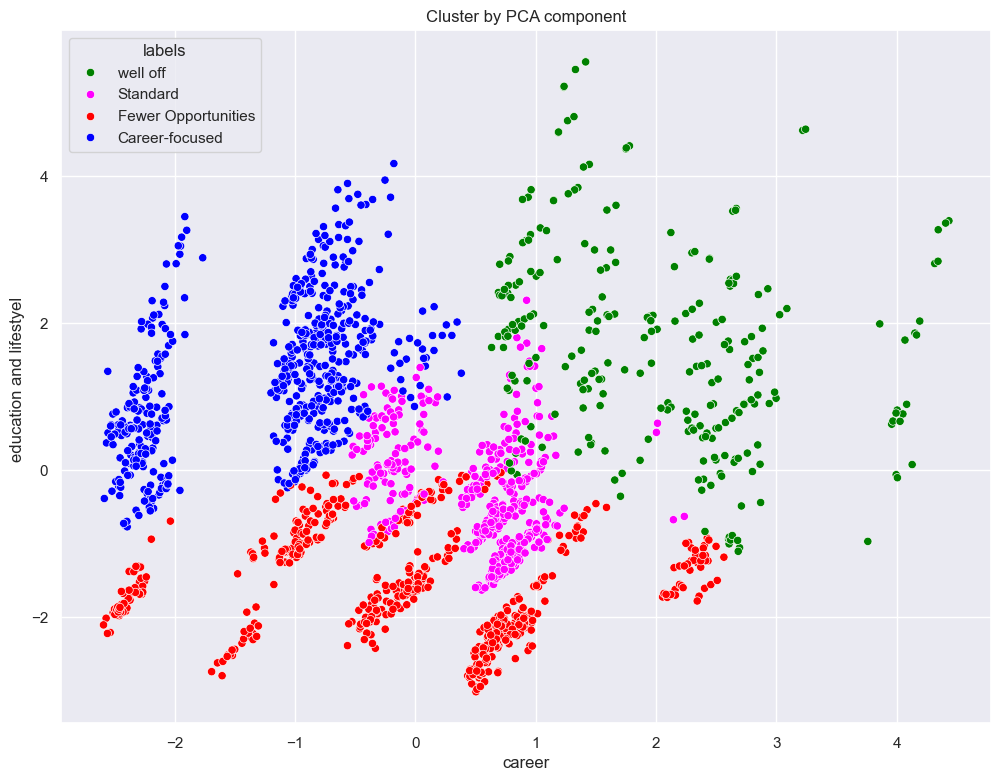

In [193]:
# visualise accourding to the first 2 components cos they are the most effective ones
x_axis=original_and_kmean_pca_df['component_2'] # related to the education and lifestyel 
y_axis=original_and_kmean_pca_df['component_1'] # related to the career 
groups=original_and_kmean_pca_df['labels']
plt.figure(figsize=(12,9))
sns.scatterplot(x=x_axis,y=y_axis,hue=groups,palette=('green','magenta','red','blue'))
plt.title('Cluster by PCA component')
plt.xlabel('career')
plt.ylabel('education and lifestyel ')
plt.show()

## Export Data

In [200]:
# To export the data we need first to save the scaler cos it had mean and std of our original data.
# We need the scaler to preprocess the future data in the same way. lets export it 
pickle.dump(scaler,open('scaler.pickle','wb'))# use dump to export the file,wb = write byte

# The PCA method and the kmeans with pca.they allow us to segment new data points based on criteria we developed here 
pickle.dump(pca,open('pca.pickle','wb'))
pickle.dump(kmean_pca,open('kmean_pca.pickle','wb'))

# The End